<a href="https://colab.research.google.com/github/ifky06/PCVK/blob/main/Praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmad Rifki Fauzi**
# **TI-3B / 04**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow #for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np

# **Praktikum**

mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


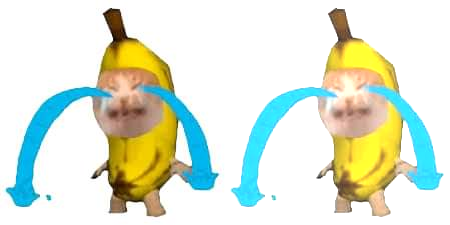

In [ ]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas**

Invers Image
--------------------------------


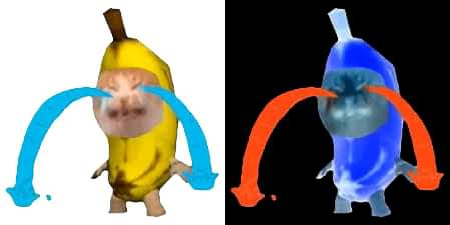

In [ ]:
#TUGAS 1

print('Invers Image')
print('--------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')
invers_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      invers_image[y,x,c] = np.clip(255 - original[y,x,c], 0, 255)

final_frame = cv.hconcat((original, invers_image))
cv2_imshow(final_frame)

mengubah tingkat kontras citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


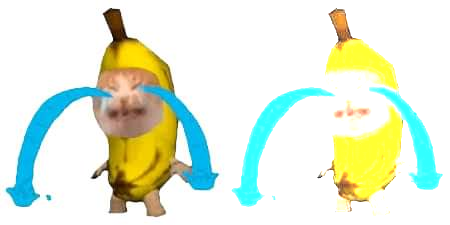

In [ ]:
#TUGAS 2

print('mengubah tingkat kontras citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


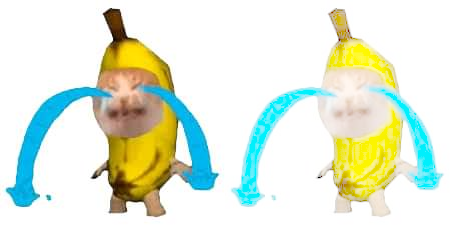

In [ ]:
#TUGAS 3

print('mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')

brightness_log_image = np.log1p(original.astype(np.float32))

# Terapkan faktor kecerahan ke gambar logaritmik
brightness_log_image = brightness_log_image* brightness

# Normalisasi ke dalam rentang 0-255
brightness_log_image = (brightness_log_image / brightness_log_image.max()) * 255

# Konversi kembali ke tipe data uint8
brightness_log_image = brightness_log_image.astype(np.uint8)

final_frame = cv.hconcat((original, brightness_log_image))
cv2_imshow(final_frame)

Average
--------------------------------


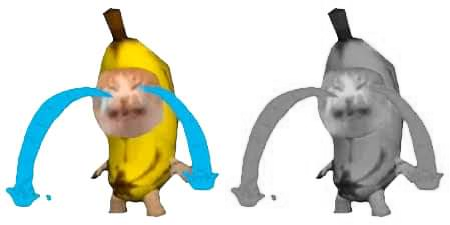

Lightness
--------------------------------


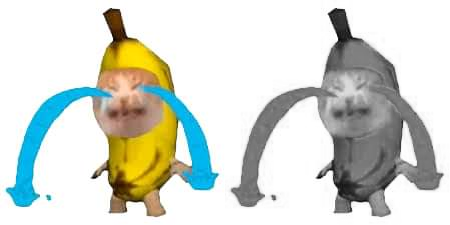

Luminance
--------------------------------


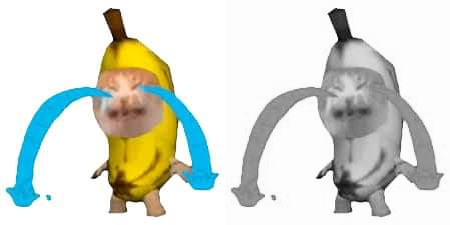

In [ ]:
#TUGAS 4

original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')


print('Average')
print('--------------------------------')

average_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      blue, green, red = original[y,x]
      average_image[y,x] = np.clip((int(red)+int(green)+int(blue))/3, 0, 255)

final_frame = cv.hconcat((original, average_image))
cv2_imshow(final_frame)


print('Lightness')
print('--------------------------------')

lightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      blue, green, red = original[y,x]
      rgb = [blue, green, red]
      lightness_image[y,x] = np.clip((int(max(rgb))+int(min(rgb)))/2, 0, 255)

final_frame = cv.hconcat((original, lightness_image))
cv2_imshow(final_frame)

print('Luminance')
print('--------------------------------')

luminance_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      blue, green, red = original[y,x]
      luminance_image[y,x] = np.clip(int(red * 0.21)+int(green * 0.72)+int(blue * 0.07), 0, 255)

final_frame = cv.hconcat((original, luminance_image))
cv2_imshow(final_frame)

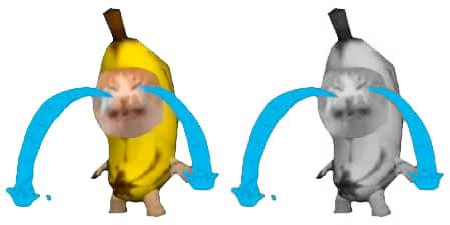

In [ ]:
#TUGAS 5
original = cv.imread('/content/drive/MyDrive/PCVK/Kitten1.jpg')


# Mengubah citra ke ruang warna HSV
hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Menentukan rentang warna biru dalam model warna HSV
lower_blue = np.array([90, 50, 50])  # Rentang warna biru bawah (H, S, V)
upper_blue = np.array([150, 255, 255])  # Rentang warna biru atas (H, S, V)

# Membuat mask untuk warna biru
mask = cv.inRange(hsv_image, lower_blue, upper_blue)

# Menggabungkan citra asli dan citra grayscale menggunakan mask
result = cv.bitwise_and(original, original, mask=mask)

# Mengubah bagian yang tidak berwarna biru menjadi grayscale
gray_mask = cv.bitwise_not(mask)
gray_part = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_part = cv.cvtColor(gray_part, cv.COLOR_GRAY2BGR)
result_gray = cv.bitwise_and(gray_part, gray_part, mask=gray_mask)

# Menggabungkan citra berwarna biru dan citra grayscale
final_result = cv.add(result, result_gray)

# Menampilkan citra asli dan hasilnya
final_frame = cv.hconcat((cv.cvtColor(original, cv.COLOR_BGR2RGB), cv.cvtColor(final_result, cv.COLOR_BGR2RGB)))
cv2_imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))
